In [4]:
# 🌱 Smart Waste Classification – Week 1 (Dataset Exploration)

!pip install tensorflow matplotlib seaborn --quiet
import os, zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image


In [5]:
!pip install -q kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d techsash/waste-classification-data
with zipfile.ZipFile("waste-classification-data.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/waste-classification-data")

!find /content/waste-classification-data -type d


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
100% 427M/427M [00:02<00:00, 158MB/s]
100% 427M/427M [00:02<00:00, 160MB/s]
/content/waste-classification-data
/content/waste-classification-data/dataset
/content/waste-classification-data/dataset/DATASET
/content/waste-classification-data/dataset/DATASET/TEST
/content/waste-classification-data/dataset/DATASET/TEST/R
/content/waste-classification-data/dataset/DATASET/TEST/O
/content/waste-classification-data/dataset/DATASET/TRAIN
/content/waste-classification-data/dataset/DATASET/TRAIN/R
/content/waste-classification-data/dataset/DATASET/TRAIN/O
/content/waste-classification-data/DATASET
/content/waste-classification-data/DATASET/TEST
/content/waste-classification-data/DATASET/TEST/R
/content/waste-classification-data/DATASET/TEST/O
/content/waste-classification-data/DATASET/TRAIN
/content/waste-classification-data/DATASET/TRAIN/R
/content/waste-cla

Waste Categories: ['R', 'O']


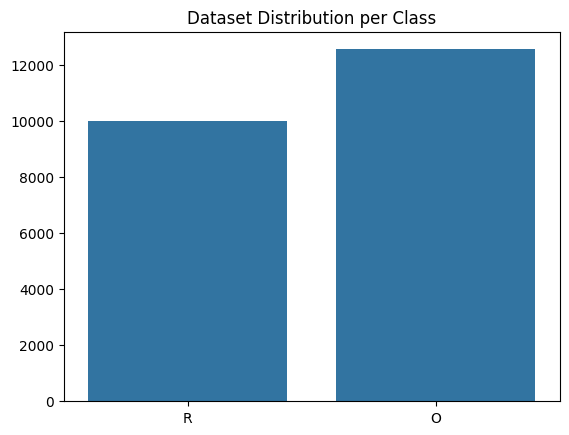

In [6]:
base_dir = '/content/waste-classification-data/DATASET/TRAIN'  # adjust if needed
classes = os.listdir(base_dir)
print("Waste Categories:", classes)

# Count images per class
count_dict = {cls: len(os.listdir(os.path.join(base_dir, cls))) for cls in classes}
sns.barplot(x=list(count_dict.keys()), y=list(count_dict.values()))
plt.title("Dataset Distribution per Class")
plt.show()


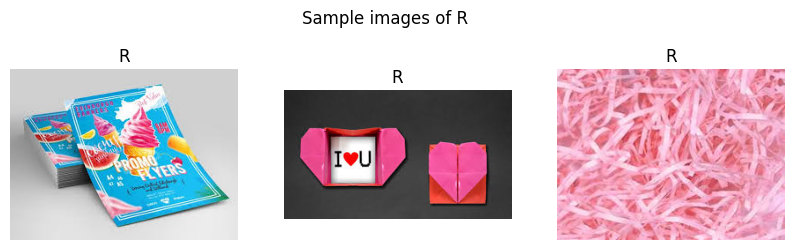

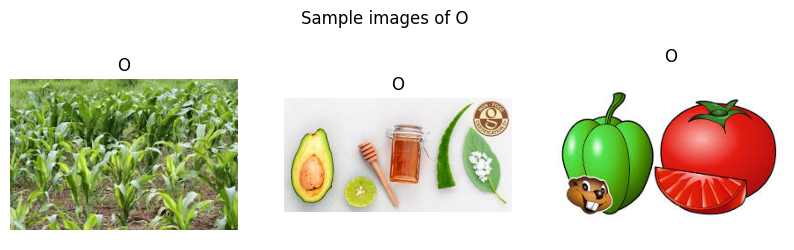

In [7]:
import random
for cls in classes:
    path = os.path.join(base_dir, cls)
    samples = random.sample(os.listdir(path), 3)
    plt.figure(figsize=(10,3))
    for i, img_name in enumerate(samples):
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path)
        plt.subplot(1,3,i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(cls)
    plt.suptitle(f"Sample images of {cls}")
    plt.show()


In [8]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    base_dir, target_size=(128,128),
    batch_size=32, class_mode='categorical', subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir, target_size=(128,128),
    batch_size=32, class_mode='categorical', subset='validation'
)

print("✅ Dataset preprocessed successfully!")


Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
✅ Dataset preprocessed successfully!
